In [20]:
import numpy as np
import pandas as pd

In [21]:
names = ["Mercure","Vénus","Terre","Mars","Jupyter","Saturne","Uranus","Neptune"]
planete = np.zeros((8,3))
planete[0] = np.array([1728*10e2,58*10e6,0])
planete[1] = np.array([1260*10e2,108*10e6,0])
planete[2] = np.array([1044*10e2,150*10e6,0])
planete[3] = np.array([864*10e2,228*10e6,0])
planete[4] = np.array([468*10e2,778*10e6,0])
planete[5] = np.array([360*10e2,1427*10e6,0])
planete[6] = np.array([252*10e2,2870*10e6,0])
planete[7] = np.array([180*10e2,4497*10e6,0])

for i in range(8):
    planete[i,2] = 1000*planete[i,0]/planete[i,1]

espace=pd.DataFrame(planete,index=names,columns=['Vitesse (km/h)','Rayon (km)','Angle de départ (radian)'])

espace.style.format({"Vitesse (km/h)":"{:.3e}","Rayon (km)":"{:.3e}"})

,Vitesse (km/h),Rayon (km),Angle de départ (radian)
Mercure,1.728e+06,5.800e+08,2.979310
Vénus,1.260e+06,1.080e+09,1.166667
Terre,1.044e+06,1.500e+09,0.696000
Mars,8.640e+05,2.280e+09,0.378947
Jupyter,4.680e+05,7.780e+09,0.060154
Saturne,3.600e+05,1.427e+10,0.025228
Uranus,2.520e+05,2.870e+10,0.008780
Neptune,1.800e+05,4.497e+10,0.004003


In [47]:
namesL = ["Lune","Phobos","Deimos"]
lunes = np.zeros((3,4))
lunes[0] = np.array([2,3685,50*384*10e3,0]) ### MULTIPLIE RAYON LUNE X50
lunes[1] = np.array([3,7697,9.4*10e3,0])
lunes[2] = np.array([3,4846,23*10e3,0])

for i in range(3):
    lunes[i,3] = 10000*lunes[i,0]/lunes[i,1]  ###ATTENTION 

espaceL=pd.DataFrame(lunes,index=namesL,columns=['Indice Planète','Vitesse (km/h)','Rayon (km)','Angle de départ (radian)'])

espaceL.style.format({"Vitesse (km/h)":"{:.3e}","Rayon (km)":"{:.3e}"})

,Indice Planète,Vitesse (km/h),Rayon (km),Angle de départ (radian)
Lune,2.000000,3.685e+03,1.920e+08,5.427408
Phobos,3.000000,7.697e+03,9.400e+04,3.897622
Deimos,3.000000,4.846e+03,2.300e+05,6.190673


In [23]:
def syst_reduit():
    """
    Systeme de Mercure jusque Mars
    """
    s = point2d((0,0), size = 1000, color ='yellow',axes = False)
    for i in range(4):
        s += circle((0,0),planete[i][1], color = 'black')
    return s

In [24]:
def syst_ext():
    """
    Systeme de Jupyter jusque Neptune
    """
    s = point2d((0,0), size = 200, color ='yellow',axes = False)
    for i in range(4,8):
        s += circle((0,0),planete[i][1], color = 'black')
    return s

In [25]:
def position(t,p,col,i = 0):
    return point2d((p[1]*cos(t*p[2]+i),p[1]*sin(t*p[2]+i)),size = 50,color = col)

In [26]:
def positionLune(t,l,i = 0):
    p = planete[int(l[0])]
    xT = p[1]*cos(t*p[2] + i)
    yT = p[1]*sin(t*p[2] + i)
    xL = l[2]*cos(t*l[3]) 
    yL = l[2]*sin(t*l[3])
    x = xT + xL
    y = yT + yL
    return point2d((x,y), size = 10, color = "grey")

In [30]:
def init_syst_reduit(t):
    S = position(t,planete[0],"red",-pi/2)
    S += position(t,planete[1],"orange",-pi/2)
    S += position(t,planete[2],"blue",pi/2)
    S += position(t,planete[3],"red")
    S += positionLune(t,lunes[0],pi/2)
    S += circle((planete[2,1]*cos(t*planete[2,2]+pi/2),planete[2,1]*sin(t*planete[2,2]+pi/2)),lunes[0,2],color="black")    
    return S

In [31]:
def init_syst_ext(t):
    S = position(t,planete[4],"red",pi)
    S += position(t,planete[5],"orange",pi)
    S += position(t,planete[6],"blue",-pi/2)
    S += position(t,planete[7],"purple",5*pi/4)
    return S

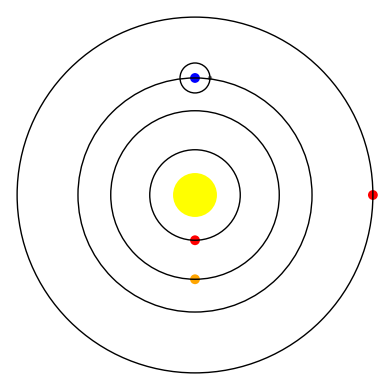

In [43]:
syst_reduit() + init_syst_reduit(0)

Animation with 100 frames
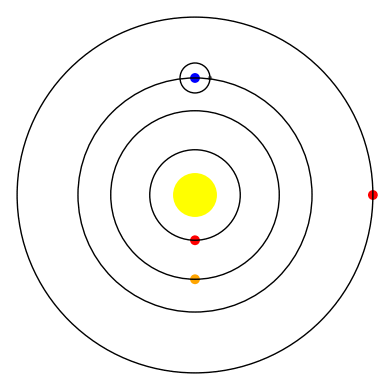

In [49]:
anim = [syst_reduit() + init_syst_reduit(n/25) for n in range(100)]
animate(anim).show()

Animation with 100 frames
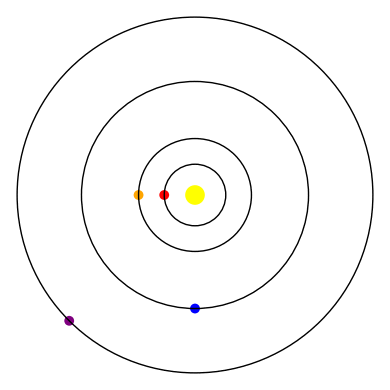

In [50]:
anim2 = [syst_ext() + init_syst_ext(n) for n in range(100)]
animate(anim2).show()